In [29]:
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [30]:
with open('The Adventures of Sherlock Holmes.txt',encoding="utf8") as text:
    book_text = text.read()

In [36]:
sections = book_text.split('* * *')
section_count = len(sections)
print(section_count)

12


In [38]:
cleaned_sections = []

for section in sections:

    quotes = re.findall("“.*?”", section)
    for quote in quotes:
        section = section.replace(quote, " ")
    cleaned_sections.append(section)
print(cleaned_sections[0])

In [39]:
characters = ["Sherlock Holmes","John H. Watson" , "Inspector G. Lestrade","The King of Bohemia","Irene Adler","Jabez Wilson","Miss Mary Sutherland","Charles McCarthy","James McCarthy","Alice McCarthy",
              "John Turner","John Openshaw","Neville St. Clair","Helen Stoner","Victor Hatherly","Violet Hunter"]
characters = [character.title() for character in characters] #oops title case


In [25]:
sections_dictionary = {}
iterative = 0
for section in cleaned_sections:
    iterative += 1
    for char in characters:
        if char in section:
            if str(iterative) in sections_dictionary.keys():
                sections_dictionary[str(iterative)].append(char)  
            else:
                sections_dictionary[str(iterative)] = [char]      

In [7]:
df = pd.DataFrame(columns = characters, index = characters)
df[:] = int(0)

#iterate through each POV of book and add one for each character-character relationship
#-> in this case, relationship equates to appearing in the same POV
for value in sections_dictionary.values():
    for character1 in characters:
        for character2 in characters:
            if character1 in value and character2 in value:
                df[character1][character2] += 1
                df[character2][character1] += 1

In [8]:
    
#add weights to edges
edge_list = [] #test networkx
for index, row in df.iterrows():
    i = 0
    for col in row:
        weight = float(col)/464
        edge_list.append((index, df.columns[i], weight))
        i += 1

#Remove edge if 0.0
updated_edge_list = [x for x in edge_list if not x[2] == 0.0]

#create duple of char, occurance in novel
node_list = []
for i in characters:
    for e in updated_edge_list:
        if i == e[0] and i == e[1]:
           node_list.append((i, e[2]*6))
for i in node_list:
    if i[1] == 0.0:
        node_list.remove(i)

#remove self references
for i in updated_edge_list:
    if i[0] == i[1]:
        updated_edge_list.remove(i)

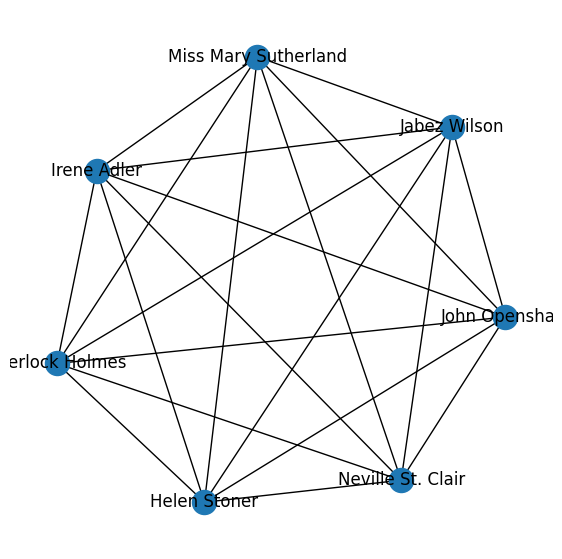

In [17]:
import matplotlib.pyplot as plt
import networkx as nx


#set canvas size
plt.subplots(figsize=(7,7))

#networkx graph time!
G = nx.Graph()
for i in sorted(node_list):
    G.add_node(i[0], size = i[1])
G.add_weighted_edges_from(updated_edge_list)

#check data of graphs
#G.nodes(data=True)
#G.edges(data = True)

#manually copy and pasted the node order using 'nx.nodes(G)'
#Couldn't determine another route to listing out the order of nodes for future work
node_order = ["Sherlock Holmes","John H. Watson" , "Inspector G. Lestrade","The King of Bohemia","Irene Adler","Jabez Wilson","Miss Mary Sutherland","Charles McCarthy","James McCarthy","Alice McCarthy",
              "John Turner","John Openshaw","Neville St. Clair","Helen Stoner","Victor Hatherly","Violet Hunter"]

#reorder node list
updated_node_order = []
for i in node_order:
    for x in node_list:
        if x[0] == i:
            updated_node_order.append(x)
            
#reorder edge list - this was a pain
test = nx.get_edge_attributes(G, 'weight')
updated_again_edges = []
for i in nx.edges(G):
    for x in test:
        if i[0] == x[0] and i[1] == x[1]:
            updated_again_edges.append(test[x])

# Draw the graph
nx.draw(G, with_labels=True)

# Show the plot
plt.show()

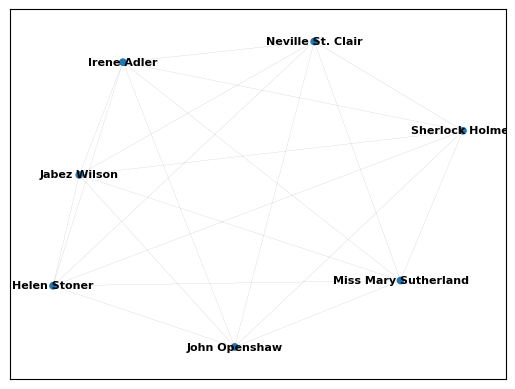

In [13]:
node_scalar = 800
edge_scalar = 10
sizes = [x[1]*node_scalar for x in updated_node_order]
widths = [x*edge_scalar for x in updated_again_edges]

#draw the graph
pos = nx.spring_layout(G, k=0.42, iterations=17)

nx.draw_networkx(G, pos, with_labels=True, font_size = 8, font_weight = 'bold', 
        node_size = sizes, width = widths)